In [7]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import pandas as pd
import numpy as np
from prophet import Prophet
import requests
import time
from tqdm import tqdm

%matplotlib inline

## Задача
На основе данных о транзакциях, ценах конкурентов, промоакциях и планах продаж написать клиента,
который для связки данных дата, SKU, user предложит цену (price).

## Метрика
По всем продажам **(цена продажи - себестоимость) + back bonus** (в случае, если было реализовано определённое количество определённого товара).

In [ ]:
# Grader
if result > 110000000:
    ch.set_points(20)
elif result > 108000000:
    ch.set_points(15)
elif result > 106000000:
    ch.set_points(10)
elif result > 103000000:
    ch.set_points(5)
elif result > 99100000:
    ch.set_points(1)

## Заметки
Цена = Себестоимость * труд + (розничные маркапы) + (оптовые маркапы)

In [341]:
UUID = "a0ba270a447941b88ee988a36670d88b"

URL_BEGIN_DATA = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/begin'
URL_TASK_DATA_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/data'
URL_TASK_RESULT_POST = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result/'
URL_TASK_RESULT_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result'
URL_LMS_TASK_RESULT_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/lms_result'

In [162]:
# Restart service
response = requests.post(URL_BEGIN_DATA.format(uuid=UUID))
response.json()

{'status': 'ok'}

## Easy Solution
    Score = 101013039

In [163]:
dftr = pd.read_csv('data/transactions.csv')

In [164]:
last_price = dftr.sort_values(['dates', 'SKU']).groupby(by = ['SKU'], as_index=False).nth(-1)[['SKU', 'price']].reset_index(drop=True)
last_price = last_price.sort_values('SKU')
assert all(x == 1 for x in last_price.value_counts(gr_cols).values)

sku = 10290
datemax = dftr[dftr.SKU == sku].dates.max()
print(datemax, 'on SKU', sku)
assert last_price[last_price.SKU == sku].price.values[0] == dftr[(dftr.SKU == sku) & (dftr.dates == datemax)].price.values[0]

2019-04-14 on SKU 10290


In [170]:
last_price.to_csv('data/last_price.csv', index=None)

In [165]:
def report_user_sku(df):
    print(df.shape, 'where', df.user_id.nunique(), 'unique users', 'and', df.SKU.nunique(), 'unique SKU')
    print('from', df.dates.min(), 'to', df.dates.max())

In [169]:
%%time

n_days=30
try:
    for _ in tqdm(range(n_days), total = n_days):
        # Get data
        response_send = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
        if type(response_send.json()) == dict:
            status = response_send.json().get('status')
            print('GET status:', status)
            if 'finished' in status:
                break #batch processing finished
        else:
            print("Received data")
        # Post data
        df = pd.read_json(response_send.json())
        report_user_sku(df)
        df = df.merge(last_price, how='left', on='SKU')
        df
        df['price'] = df['price'] * 1.05
        response_receive = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                         data=df.to_json(orient='records'))
        print('POST status:', response_receive.json().get('status'))
        time.sleep(1)
except Exception as e:
    print('Error:', e)
    response_lms = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))
    print("LMS:", response_lms.json())

  0%|                                                            | 0/30 [00:00<?, ?it/s]

Received data
(9639, 3) where 7615 unique users and 816 unique SKU
from 2019-12-21 to 2019-12-21
POST status: ok


  3%|█▋                                                  | 1/30 [00:14<07:13, 14.96s/it]

Received data
(9615, 3) where 7623 unique users and 814 unique SKU
from 2019-12-22 to 2019-12-22
POST status: ok


  7%|███▍                                                | 2/30 [00:32<07:36, 16.32s/it]

Received data
(9615, 3) where 7661 unique users and 814 unique SKU
from 2019-12-23 to 2019-12-23
POST status: ok


 10%|█████▏                                              | 3/30 [00:47<07:10, 15.93s/it]

Received data
(9613, 3) where 7595 unique users and 814 unique SKU
from 2019-12-24 to 2019-12-24
POST status: ok


 13%|██████▉                                             | 4/30 [01:06<07:28, 17.24s/it]

Received data
(9614, 3) where 7629 unique users and 814 unique SKU
from 2019-12-25 to 2019-12-25
POST status: ok


 17%|████████▋                                           | 5/30 [01:21<06:50, 16.42s/it]

Received data
(9613, 3) where 7615 unique users and 814 unique SKU
from 2019-12-26 to 2019-12-26
POST status: ok


 20%|██████████▍                                         | 6/30 [01:36<06:15, 15.67s/it]

Received data
(9603, 3) where 7608 unique users and 813 unique SKU
from 2019-12-27 to 2019-12-27
POST status: ok


 23%|████████████▏                                       | 7/30 [01:51<06:00, 15.67s/it]

Received data
(9606, 3) where 7647 unique users and 813 unique SKU
from 2019-12-28 to 2019-12-28
POST status: ok


 27%|█████████████▊                                      | 8/30 [02:07<05:41, 15.53s/it]

Received data
(9592, 3) where 7611 unique users and 812 unique SKU
from 2019-12-29 to 2019-12-29
POST status: ok


 30%|███████████████▌                                    | 9/30 [02:22<05:26, 15.53s/it]

Received data
(9582, 3) where 7566 unique users and 811 unique SKU
from 2019-12-30 to 2019-12-30
POST status: ok


 33%|█████████████████                                  | 10/30 [02:38<05:17, 15.89s/it]

GET status: batch processing finished
CPU times: user 1 s, sys: 59 ms, total: 1.06 s
Wall time: 2min 38s


<br></br><br>

## Transactions samples analysis

In [269]:
import sys
from importlib import reload
sys.path.append('/home/nur/projects/advanced_ml/dynamic_price/final')
from dynprice import edautils as eu

In [172]:
dftr = pd.read_csv('data/transactions.csv')
last_price = pd.read_csv('data/last_price.csv')
dftr.dates = pd.to_datetime(dftr.dates)

In [271]:
reload(eu)
pivot_t, dfsample_agg = eu.get_sku_pivot(dftr, random_count=25)
dfsample_agg.head(2)

,dates,SKU,price,num_purchases
0,2018-03-07,64998,3476.0,7
1,2018-03-08,64998,3476.0,5


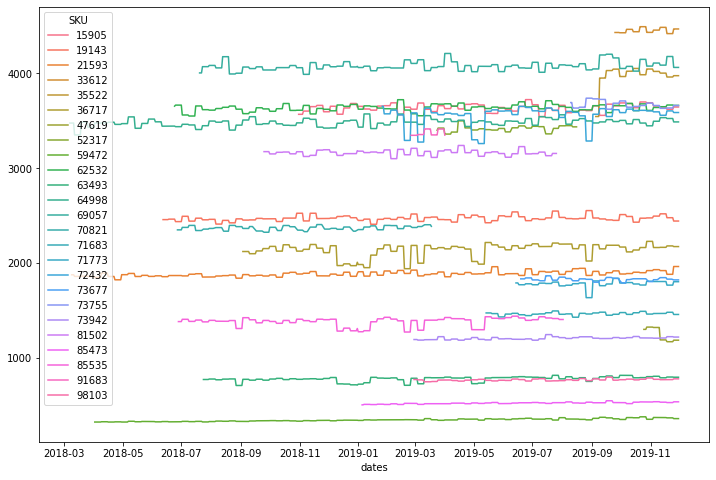

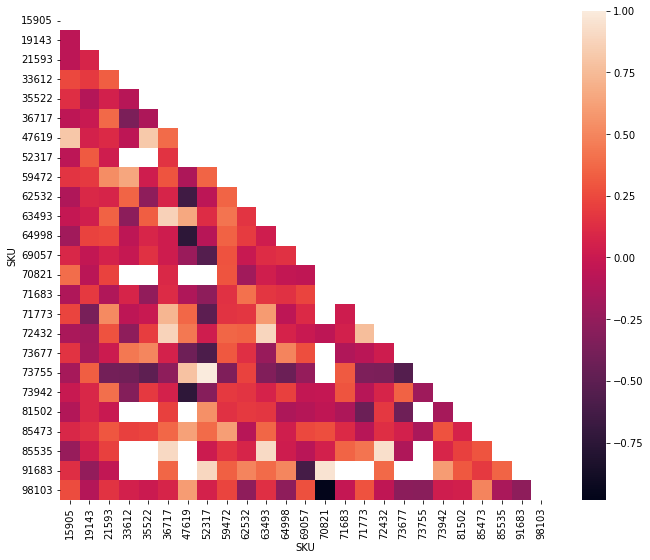

In [274]:
reload(eu)
eu.sku_corr_plot(pivot_t)

In [279]:
reload(eu)
dd_high_corr_pairs = eu.top_corr_pairs(pivot_t)
dd_high_corr_pairs.head(5)

Shape (14, 3)


,SKU_1,SKU_2,correlation
0,15905,47619,0.808525
1,35522,47619,0.821801
2,36717,63493,0.861243
3,36717,72432,0.871252
4,36717,85535,0.906867


<AxesSubplot:xlabel='dates'>

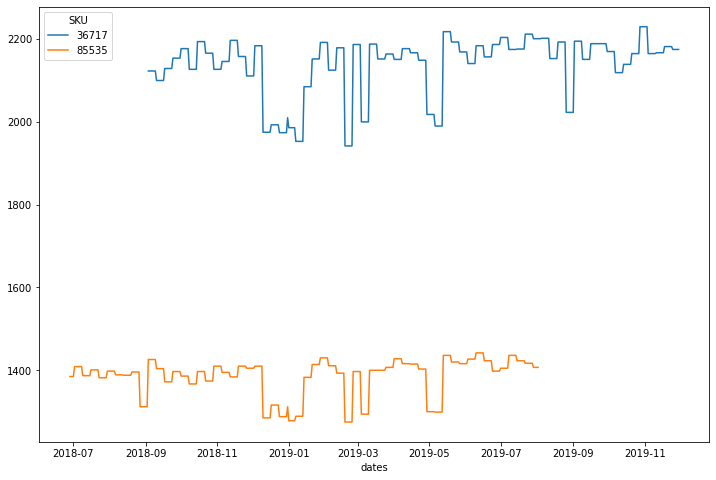

In [281]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t[[36717, 85535]], dashes=False)

In [285]:
reload(eu)
chain = eu.group_corr_chain(dd_high_corr_pairs)
chain

{15905: {47619},
 36717: {63493, 72432, 85535},
 47619: {64998, 73755},
 52317: {91683},
 70821: {98103}}

<br></br><br></br>

## Анализ среднего изменения маркапа

In [331]:
reload(eu)
tr_agg = eu.extend_transactions_cols(dftr)
tr_agg.head(2)

,SKU,year,month,price,prev_price,perc_diff,trend_coef
0,10060,2019,4,2778.477612,NaN,NaN,NaN
1,10060,2019,5,2671.672727,2778.477612,1.039977,0.039977


In [300]:
# Цена прыгает на +-15%
tr_agg.perc_diff.describe()

count    10386.000000
mean         0.998628
std          0.023269
min          0.869826
25%          0.991930
50%          0.998206
75%          1.004325
max          1.157807
Name: perc_diff, dtype: float64

In [297]:
tr_agg.groupby('SKU').trend_coef.mean()

SKU
10060    0.021845
10121    0.010137
10216    0.027811
10230    0.002659
10290    0.006049
           ...   
99310    0.020035
99905    0.004275
99965    0.004668
99974    0.009326
99996    0.023010
Name: trend_coef, Length: 1000, dtype: float64

In [323]:
whole_sales_price = pd.read_csv('data/wholesale_trade_table.csv')
sales_plan = pd.read_csv('data/sales_plan.csv')

In [326]:
total_bonus = sales_plan[(sales_plan.year == 2019) & (sales_plan.month == 12)].back_bonus.sum()
f"Максимальный бонус за декабрь 2019 = {total_bonus}"

'Максимальный бонус за декабрь 2019 = 98160000'

In [327]:
whole_sales_fin = whole_sales_price[(whole_sales_price.year == 2019) & (whole_sales_price.month == 12)]
whole_sales_fin.head(2)

,SKU,year,week_num,month,cost_price
0,10060,2019,1,12,2211.0
41,10060,2019,48,12,2454.0


In [342]:
# Restart service
response = requests.post(URL_BEGIN_DATA.format(uuid=UUID))
response.json()

{'status': 'ok'}

In [ ]:
%%time
reload(eu)

n_days=31
try:
    for _ in tqdm(range(n_days), total = n_days):
        # Get data
        response_send = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
        if type(response_send.json()) == dict:
            status = response_send.json().get('status')
            print('GET status:', status)
            if 'finished' in status:
                break #batch processing finished
        else:
            print("Received data")
        # Post data
        df = pd.read_json(response_send.json())
        df = eu.extend_date(df)
        report_user_sku(df)
        df = df.merge(whole_sales_fin, how='left', on=['SKU', 'year', 'week_num', 'month'])
        
        df['price'] = df.cost_price * 1.14
        df.dates = df.dates.dt.strftime('%Y-%m-%d')
        response_receive = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                         data=df[['dates', 'SKU', 'user_id', 'price']].to_json(orient='records'))
        print('POST status:', response_receive.json().get('status'))
        time.sleep(1)
except Exception as e:
    print('Error:', e)
    response_lms = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))
    print("LMS:", response_lms.json())

  0%|                                                            | 0/31 [00:00<?, ?it/s]

Received data
(9739, 8) where 7676 unique users and 826 unique SKU
from 2019-12-01 00:00:00 to 2019-12-01 00:00:00
POST status: ok


  3%|█▋                                                  | 1/31 [00:13<06:48, 13.63s/it]

Received data
(9740, 8) where 7768 unique users and 826 unique SKU
from 2019-12-02 00:00:00 to 2019-12-02 00:00:00
POST status: ok


  6%|███▎                                                | 2/31 [00:27<06:37, 13.72s/it]

Received data
(9739, 8) where 7672 unique users and 826 unique SKU
from 2019-12-03 00:00:00 to 2019-12-03 00:00:00
POST status: ok


 10%|█████                                               | 3/31 [00:41<06:25, 13.75s/it]

Received data
(9735, 8) where 7707 unique users and 826 unique SKU
from 2019-12-04 00:00:00 to 2019-12-04 00:00:00
POST status: ok


 13%|██████▋                                             | 4/31 [00:56<06:25, 14.27s/it]

Received data
(9740, 8) where 7695 unique users and 826 unique SKU
from 2019-12-05 00:00:00 to 2019-12-05 00:00:00
POST status: ok


 16%|████████▍                                           | 5/31 [01:15<07:02, 16.24s/it]

Received data
(9737, 8) where 7751 unique users and 826 unique SKU
from 2019-12-06 00:00:00 to 2019-12-06 00:00:00
POST status: ok


 19%|██████████                                          | 6/31 [01:30<06:32, 15.68s/it]

Received data
(9737, 8) where 7775 unique users and 826 unique SKU
from 2019-12-07 00:00:00 to 2019-12-07 00:00:00
POST status: ok


 23%|███████████▋                                        | 7/31 [01:44<06:05, 15.22s/it]

Received data
(9718, 8) where 7709 unique users and 824 unique SKU
from 2019-12-08 00:00:00 to 2019-12-08 00:00:00
POST status: ok


 26%|█████████████▍                                      | 8/31 [02:05<06:26, 16.80s/it]

Received data
(9696, 8) where 7676 unique users and 822 unique SKU
from 2019-12-09 00:00:00 to 2019-12-09 00:00:00
POST status: ok


 29%|███████████████                                     | 9/31 [02:20<06:02, 16.46s/it]

Received data
(9696, 8) where 7707 unique users and 822 unique SKU
from 2019-12-10 00:00:00 to 2019-12-10 00:00:00
POST status: ok


 32%|████████████████▍                                  | 10/31 [02:35<05:33, 15.86s/it]

Received data
(9699, 8) where 7719 unique users and 822 unique SKU
from 2019-12-11 00:00:00 to 2019-12-11 00:00:00
POST status: ok


 35%|██████████████████                                 | 11/31 [02:49<05:07, 15.38s/it]

Received data
(9685, 8) where 7632 unique users and 820 unique SKU
from 2019-12-12 00:00:00 to 2019-12-12 00:00:00
POST status: ok


 39%|███████████████████▋                               | 12/31 [03:03<04:45, 15.00s/it]

Received data
(9669, 8) where 7669 unique users and 819 unique SKU
from 2019-12-13 00:00:00 to 2019-12-13 00:00:00
POST status: ok


 42%|█████████████████████▍                             | 13/31 [03:24<05:03, 16.88s/it]

Received data
(9674, 8) where 7648 unique users and 819 unique SKU
from 2019-12-14 00:00:00 to 2019-12-14 00:00:00
POST status: ok


 45%|███████████████████████                            | 14/31 [03:39<04:36, 16.26s/it]

Received data
(9673, 8) where 7664 unique users and 819 unique SKU
from 2019-12-15 00:00:00 to 2019-12-15 00:00:00
POST status: ok


 48%|████████████████████████▋                          | 15/31 [03:53<04:09, 15.60s/it]

Received data
(9658, 8) where 7570 unique users and 818 unique SKU
from 2019-12-16 00:00:00 to 2019-12-16 00:00:00
POST status: ok


 52%|██████████████████████████▎                        | 16/31 [04:10<03:59, 15.96s/it]

Received data
(9657, 8) where 7621 unique users and 818 unique SKU
from 2019-12-17 00:00:00 to 2019-12-17 00:00:00
POST status: ok


 55%|███████████████████████████▉                       | 17/31 [04:25<03:37, 15.52s/it]

Received data
(9658, 8) where 7671 unique users and 818 unique SKU
from 2019-12-18 00:00:00 to 2019-12-18 00:00:00
POST status: ok


 58%|█████████████████████████████▌                     | 18/31 [04:39<03:17, 15.17s/it]

Received data
(9659, 8) where 7590 unique users and 818 unique SKU
from 2019-12-19 00:00:00 to 2019-12-19 00:00:00
POST status: ok


 61%|███████████████████████████████▎                   | 19/31 [04:53<02:57, 14.76s/it]

Received data
(9636, 8) where 7693 unique users and 816 unique SKU
from 2019-12-20 00:00:00 to 2019-12-20 00:00:00
POST status: ok


 65%|████████████████████████████████▉                  | 20/31 [05:16<03:09, 17.21s/it]

Received data
(9633, 8) where 7587 unique users and 816 unique SKU
from 2019-12-21 00:00:00 to 2019-12-21 00:00:00
POST status: ok


 68%|██████████████████████████████████▌                | 21/31 [05:34<02:56, 17.66s/it]

Received data
(9617, 8) where 7682 unique users and 814 unique SKU
from 2019-12-22 00:00:00 to 2019-12-22 00:00:00
POST status: ok


 71%|████████████████████████████████████▏              | 22/31 [05:49<02:30, 16.74s/it]

Received data
(9617, 8) where 7668 unique users and 814 unique SKU
from 2019-12-23 00:00:00 to 2019-12-23 00:00:00
POST status: ok


 74%|█████████████████████████████████████▊             | 23/31 [06:03<02:06, 15.87s/it]

Received data
(9616, 8) where 7622 unique users and 814 unique SKU
from 2019-12-24 00:00:00 to 2019-12-24 00:00:00
POST status: ok


 77%|███████████████████████████████████████▍           | 24/31 [06:23<02:01, 17.31s/it]

Received data
(9614, 8) where 7602 unique users and 814 unique SKU
from 2019-12-25 00:00:00 to 2019-12-25 00:00:00
POST status: ok


 81%|█████████████████████████████████████████▏         | 25/31 [06:39<01:39, 16.63s/it]

Received data
(9616, 8) where 7601 unique users and 814 unique SKU
from 2019-12-26 00:00:00 to 2019-12-26 00:00:00
POST status: ok


 84%|██████████████████████████████████████████▊        | 26/31 [06:53<01:20, 16.08s/it]

Received data
(9607, 8) where 7618 unique users and 813 unique SKU
from 2019-12-27 00:00:00 to 2019-12-27 00:00:00
POST status: ok


 87%|████████████████████████████████████████████▍      | 27/31 [07:09<01:03, 15.84s/it]

Received data
(9602, 8) where 7662 unique users and 813 unique SKU
from 2019-12-28 00:00:00 to 2019-12-28 00:00:00
POST status: ok


 90%|██████████████████████████████████████████████     | 28/31 [07:29<00:51, 17.32s/it]

Received data
(9593, 8) where 7626 unique users and 812 unique SKU
from 2019-12-29 00:00:00 to 2019-12-29 00:00:00


<br></br><br></br>

## Подход моделирования на основе трендов, груп  сезонности и индикаторов эластичности по SKU

In [ ]:
transactions_aggr = pd.read_csv('transactions_aggr_new.csv')
transactions_aggr.dates = pd.to_datetime(transactions_aggr.dates)

In [ ]:
transactions_aggr['week_day'] = transactions_aggr.dates.dt.weekday
transactions_aggr['week_num'] = transactions_aggr.dates.dt.weekday
transactions_aggr['year'] = transactions_aggr.dates.dt.year
transactions_aggr['month'] = transactions_aggr.dates.dt.month
transactions_aggr['dates_int'] = transactions_aggr.dates.astype(int)
transactions_aggr

In [ ]:
dummies = pd.get_dummies(df['SKU'])
df = pd.concat([df, pd.get_dummies(df.SKU)], axis=1)

In [ ]:
model_dict = {}
dummy_sku_dicts = {}
cols = ['dates_int', 'SKU', 'week_num', 'year', 'elastic', 'week_day', 'month','price']
for season in transactions_aggr.season.unique():
    df = transactions_aggr[transactions_aggr.season==season][cols]
    dummies = pd.get_dummies(df['SKU'])
    df = pd.concat([df, pd.get_dummies(df.SKU)], axis=1)
    sku_list = [c for c in df.columns if c not in cols]
    dummy_sku_dicts[season] = sku_list
    xgb_train = xgb.DMatrix(df.drop(['SKU','price'], axis=1)
                        , df['price']
                        , feature_names = [str(i) for i in df.drop(['SKU','price'], axis=1).columns])
    model = xgb.train(params = xgb_params
                  , dtrain = xgb_train
                  , num_boost_round = 1000)
    model_dict[season] = model

In [ ]:
model_dict

In [ ]:
model_dict[0].feature_names

<br></br><br></br><br></br><br></br>

<AxesSubplot:>

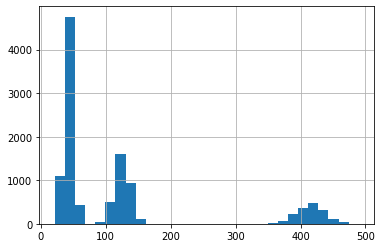

In [316]:
dftr.user_id.value_counts().hist(bins=30)

In [304]:
user_aggr = dftr.groupby('user_id').price.count().reset_index().rename(columns={'price':'num_purchases'})

In [305]:
user_aggr['freq_group'] = 0
user_aggr.loc[user_aggr.num_purchases >80, 'freq_group'] = 1
user_aggr.loc[user_aggr.num_purchases >200, 'freq_group'] = 2

In [306]:
user_aggr

,user_id,num_purchases,freq_group
0,10002,41,0
1,10003,449,2
2,10006,37,0
3,10008,45,0
4,10009,132,1
...,...,...,...
11057,49992,39,0
11058,49993,128,1
11059,49994,38,0
11060,49995,43,0


<br></br><br></br><br></br><br></br>

In [ ]:
reload(eu)
df = eu.extend_date(df)
df.types

In [ ]:
season_elastic_mapping = transactions_aggr.groupby(['SKU'])['season','elastic'].max().reset_index()

In [ ]:
season_elastic_mapping

In [ ]:
df = df.merge(season_elastic_mapping, how='left', on='SKU')

In [ ]:
df.columns

In [ ]:
df_w_price =pd.DataFrame() 
for season in df.season.unique():
    print(season)
    model = model_dict[season]
    right_order = model.feature_names
    pre_xgb = df[df.season == season]\
    [['SKU', 'user_id', 'week_day', 'week_num', 'year','month', 'dates_int', 'elastic']]
    dummies = pd.get_dummies(pre_xgb['SKU'])
    pre_xgb = pd.concat([pre_xgb, pd.get_dummies(pre_xgb.SKU)], axis=1)
    # fill dummies
    for dummy_col in dummy_sku_dicts[season]:
        if dummy_col not in pre_xgb.columns:
            pre_xgb[dummy_col] = 0
            
    pre_xgb.columns = [str(i) for i in pre_xgb.columns]

    
    xgb_test = xgb.DMatrix(pre_xgb.drop(['SKU','user_id'], axis=1)[right_order]
                        , feature_names = pre_xgb.drop(['SKU','user_id'], axis=1)[right_order].columns)
    pre_xgb['price'] = model.predict(xgb_test)
    df_w_price = pd.concat([df_w_price, pre_xgb[['SKU','dates_int', 'price','user_id']]])

In [ ]:
df_w_price

In [ ]:
df = df.merge(df_w_price, how='left', on=['SKU','user_id', 'dates_int'])

In [ ]:
df.dates = df.dates.dt.strftime('%Y-%m-%d')
df[['dates', 'SKU', 'user_id', 'price']]

In [ ]:
df['price'] = df['price'] * 0.9

In [ ]:
response = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                 data=df[['dates', 'SKU', 'user_id', 'price']].to_json(orient='records'))

In [ ]:
response.json()

In [ ]:
response = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))

In [ ]:
response.json()

In [ ]:
5418051 

In [ ]:
11456008 - 5418051 

In [ ]:
18770384 - 11456008

<br></br><br></br><br></br><br></br>

In [ ]:
response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
df = pd.read_json(response.json())
df.dates = pd.to_datetime(df.dates)
df['week_day'] = df.dates.dt.weekday
df['week_num'] = df.dates.dt.week
df['year'] = df.dates.dt.year
df['month'] = df.dates.dt.month
df['dates_int'] = df.dates.astype(int)
season_elastic_mapping = transactions_aggr.groupby(['SKU'])['season','elastic'].max().reset_index()
df = df.merge(season_elastic_mapping, how='left', on='SKU')

df_latest = pd.read_json(response.json())
df_latest = df_latest.merge(last_price, how='left', on='SKU')
df_latest['price'] = df_latest['price'] * 0.83


df_w_price =pd.DataFrame() 

for season in df.season.unique():
    print(season)
    model = model_dict[season]
    right_order = model.feature_names
    pre_xgb = df[df.season == season]\
    [['SKU', 'user_id', 'week_day', 'week_num', 'year','month', 'dates_int', 'elastic']]
    dummies = pd.get_dummies(pre_xgb['SKU'])
    pre_xgb = pd.concat([pre_xgb, pd.get_dummies(pre_xgb.SKU)], axis=1)
    # fill dummies
    for dummy_col in dummy_sku_dicts[season]:
        if dummy_col not in pre_xgb.columns:
            pre_xgb[dummy_col] = 0
            
    pre_xgb.columns = [str(i) for i in pre_xgb.columns]

    
    xgb_test = xgb.DMatrix(pre_xgb.drop(['SKU','user_id'], axis=1)[right_order]
                        , feature_names = pre_xgb.drop(['SKU','user_id'], axis=1)[right_order].columns)
    pre_xgb['price'] = model.predict(xgb_test)
    df_w_price = pd.concat([df_w_price, pre_xgb[['SKU','dates_int', 'price','user_id']]])
df = df.merge(df_w_price, how='left', on=['SKU','user_id', 'dates_int'])
df.dates = df.dates.dt.strftime('%Y-%m-%d')
xgb_df = df[['dates', 'SKU', 'user_id', 'price']]




In [ ]:
df_mean = xgb_df.merge(df_latest, how='left', on=['SKU', 'dates', 'user_id'])
df_mean['price'] = (df_mean.price_x + df_mean.price_y)/2

In [ ]:
df_mean

In [ ]:
df_mean['pred_price'] = df_mean.apply(lambda x: np.random.choice([x.price_x, x.price_y, x.price]), axis=1)

In [ ]:

response = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                 data=df_mean[['SKU', 'dates', 'user_id', 'pred_price']].rename(columns={'pred_price': 'price'}).to_json(orient='records'))

In [ ]:
response.json()

In [ ]:
response = requests.get(URL_TASK_RESULT_GET.format(uuid=UUID))
df_b = pd.read_json(response.json())

In [ ]:
df_b

<br></br><br></br><br></br><br></br>

In [ ]:
transactions_aggr_new = pd.read_csv('transactions_aggr.csv')

In [ ]:
transactions_aggr_new

<br></br><br></br><br></br><br></br>

In [ ]:
"a.kim-1";"30608308"
"a.latskov-1";"34320751"
"a.oprish-1";"33503361"
"a.ovsjannikova";"30861018"
"a.sadykovich-1";"30221414"
"a.serkov-1";"34806396"
"a.shishkin-1";"34690717"
"a.tolmach-1";"32887320"
"b.ustjugov-1";"33104446"
"d.zankov-1";"31189162"
"e.kozhevnikov-1";"33656545"
"i.koretskij-1";"32336324"
"i.leuhin-1";"33846395"
"i.moiseev-1";"28679809"
"k.dokuchaev-1";"28441807"
"k.porshnev-1";"30172939"
"k.zatylkina-1";"31228483"
"m.meleshkin-1";"32481889"
"m.samsonov-1";"33619290"
"p.pogozhij-1";"32078051"
"stasgafarov";"32078051"
"t.kutuzova-1";"31922397"
"v.popov-1";"29967473"